## Localize Simulated Source Locations
- Define function `localizeSource` which performs source localization using the method developed by [H. Schau et al. 1987](https://ieeexplore.ieee.org/abstract/document/1165266)
- `localizeSource` computes the source location using recordings from `4 receivers`
- Test the function using simulated source locations `with` and `without` `jitters.`


In [42]:
# Import numpy
import numpy as np
from numpy import random

# import matplot
import matplotlib.pyplot as plt

# import random
import random

### Define `localizeSource`
- `localizeSource` computes the source positions by intersecting spheres formed by non-reference receivers (receiver 1-3)
- Receiver 4 is the reference receiver, which becomes the origin same as [H. Schau et al. 1987](https://ieeexplore.ieee.org/abstract/document/1165266)
- Computed source positions are `two` for single set of input arguments, as the method computes quadratic equations

In [5]:
# define localizeSource

def localizeSource(rcvPos,delTOA,c=343):
    
    if rcvPos.shape != (4,3):
        raise AssertionError("Receiver positions need to have dimensions of (4,3)")
    
    if delTOA.shape != (3,):
        raise AssertionError("Time-of-arrival differences need to have dimensions of (3,) ")
    
    # receiver positions
    r1=rcvPos[0]; r2=rcvPos[1]; r3=rcvPos[2]; r4=rcvPos[3]

    # difference in distance between receiver 1-3 and receiver 4 (ref) computed from the time-of-arrival (TOA) difference
    d14=c*delTOA[0]; d24=c*delTOA[1]; d34=c*delTOA[2]

    # radii of spheres formed by receivers (fourth receiver is ref, origin)
    R1=np.sqrt(r1[0]**2+r1[1]**2+r1[2]**2)
    R2=np.sqrt(r2[0]**2+r2[1]**2+r2[2]**2)
    R3=np.sqrt(r3[0]**2+r3[1]**2+r3[2]**2)

    # matrices and vectors used to compute coefficients of the quadratic equation
    DEL=np.array([R1**2-d14**2,R2**2-d24**2, R3**2-d34**2]); DEL=DEL.reshape(3,1)
    d=np.array([d14,d24,d34]); d=d.reshape(3,1)
    M=np.array([[r1],[r2],[r3]]); M=M.reshape(3,3)

    # coefficients to compute quadratic equation of Rs
    a=4-4*np.dot(np.dot(np.transpose(d),np.dot(np.transpose(np.linalg.inv(M)),np.linalg.inv(M))),d);a=a.reshape(1)
    b=2*np.dot(np.dot(np.dot(np.transpose(d),np.transpose(np.linalg.inv(M))),np.linalg.inv(M)),DEL)+2*np.dot(np.dot(np.dot(np.transpose(DEL),np.transpose(np.linalg.inv(M))),np.linalg.inv(M)),d); b=b.reshape(1) 
    c=-np.dot(np.dot(np.dot(np.transpose(DEL),np.transpose(np.linalg.inv(M))),np.linalg.inv(M)),DEL);c=c.reshape(1)

    # two solutions of the quadratic equations to compute Rs
    Rs_1=(-b+np.sqrt(b**2-4*a*c))/(2*a);
    Rs_2=(-b-np.sqrt(b**2-4*a*c))/(2*a);
    Rs=np.array([Rs_1,Rs_2]);
    
    # two source positions computed with the computed Rs
    srcPos1=1/2*np.dot(np.linalg.inv(M),(DEL-2*Rs[0]*d));srcPos1=srcPos1.reshape(1,3)
    srcPos2=1/2*np.dot(np.linalg.inv(M),(DEL-2*Rs[1]*d));srcPos2=srcPos2.reshape(1,3)

    return srcPos1,srcPos2

### Define the receiver positions `rcvPos` used in the experiments
- Receiver 4 is the reference receiver, with position (0,0,0)
- Receiver 1-3 positions followed the setup of our field experiment taken place in `2023-09-15`

In [6]:
# define receiver positions (rcvPos)
L=0.635 # sidelength of the array cube in [m]
rcvPos=np.array([[0,0,L],[0,-L,L],[-L,0,L],[0,0,0]])

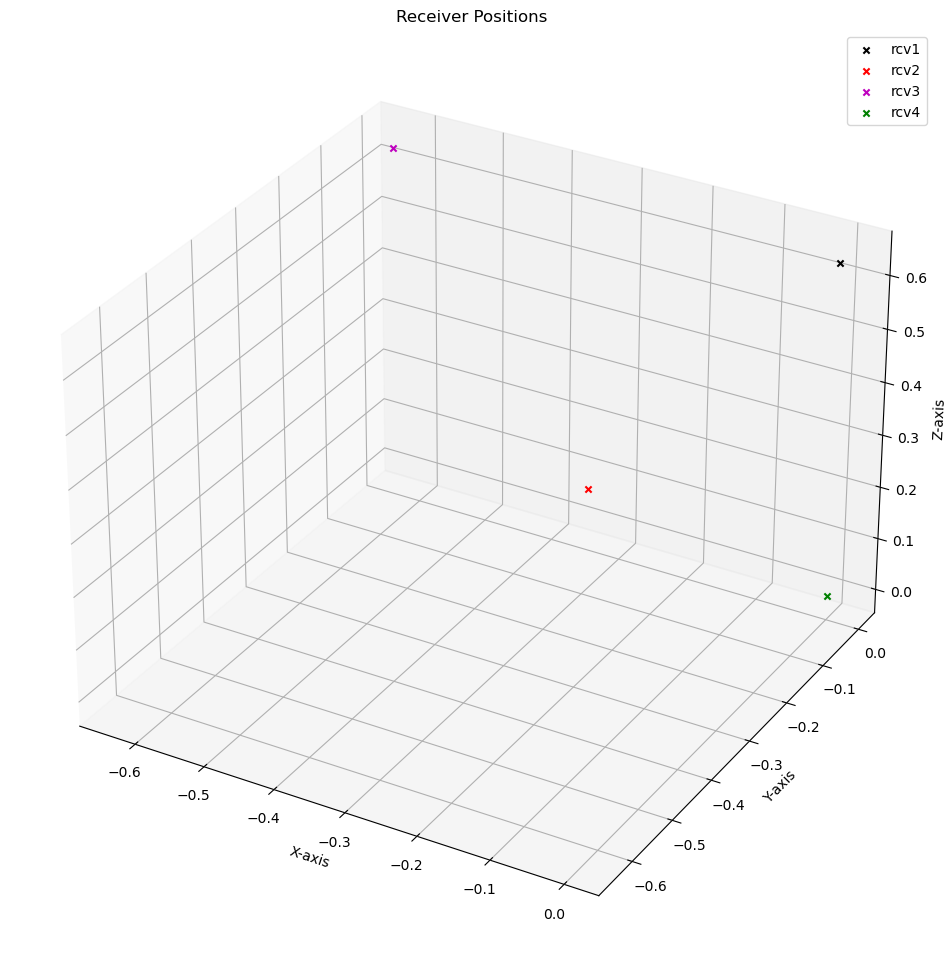

In [21]:
# plot receiver positions
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(rcvPos[0,0],rcvPos[0,1],rcvPos[0,2],c = 'k',label='rcv1', marker='x')
ax.scatter3D(rcvPos[1,0],rcvPos[1,1],rcvPos[1,2],c = 'r',label='rcv2', marker='x')
ax.scatter3D(rcvPos[2,0],rcvPos[2,1],rcvPos[2,2],c = 'm',label='rcv3', marker='x')
ax.scatter3D(rcvPos[3,0],rcvPos[3,1],rcvPos[3,2],c = 'g',label='rcv4', marker='x')
ax.set_xlabel('X-axis');ax.set_ylabel('Y-axis');ax.set_zlabel('Z-axis');ax.legend()
#ax.set_xlim3d(-0.7,0);ax.set_ylim3d(0,0.7);ax.set_zlim3d(0,0.7)
plt.title('Receiver Positions');plt.show()

### Simulated source positions
- Source positions with a spiral trajectory simulated

In [22]:
# simulated source positions
t=np.linspace(0,5,100) #  in [s]
srcPosSim=np.array([5*np.multiply(np.sin(1*t),np.cos(1*t)), 5*np.multiply(np.sin(1*t),np.sin(1*t)), 5*np.cos(1*t)]); # in [m]
srcPosSim=np.transpose(srcPosSim)

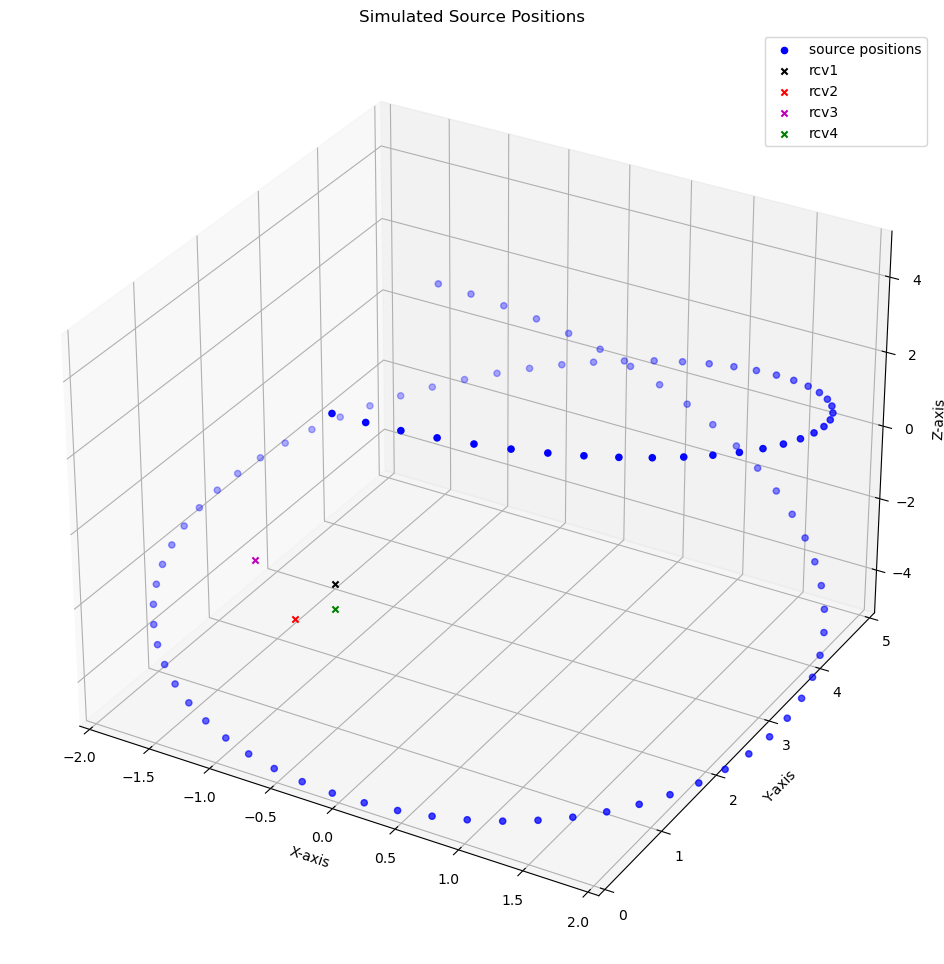

In [26]:
# plot simulated source positions
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(srcPosSim[:,0], srcPosSim[:,1], srcPosSim[:,2],label='source positions', c = 'b', marker='o')
ax.scatter3D(rcvPos[0,0],rcvPos[0,1],rcvPos[0,2],c = 'k',label='rcv1', marker='x')
ax.scatter3D(rcvPos[1,0],rcvPos[1,1],rcvPos[1,2],c = 'r',label='rcv2', marker='x')
ax.scatter3D(rcvPos[2,0],rcvPos[2,1],rcvPos[2,2],c = 'm',label='rcv3', marker='x')
ax.scatter3D(rcvPos[3,0],rcvPos[3,1],rcvPos[3,2],c = 'g',label='rcv4', marker='x')
ax.set_xlabel('X-axis');ax.set_ylabel('Y-axis');ax.set_zlabel('Z-axis')
ax.set_xlim3d(-2,2);ax.set_ylim3d(0,5);ax.set_zlim3d(-5,5);ax.legend()
plt.title('Simulated Source Positions');plt.show()

### Run `localizeSource` and compute the source positions
- In the simulated source positions, time-of-arrival (TOA) can be calculated instead of measurement
- Using the computed TOA differences, run `localizeSource` and compute the source positions 
- There are two outputs from `localizeSource`, as a result of solving `quadratic equations.` 
- Therefore, the plots will show twice as many as points in the computed source positions
- Source positions can be either (or nor) of the two solutions. 
- Test `with and without jittering` the difference in TOA

In [62]:
# computed source positions
srcPos1=np.zeros((100,3));srcPos2=np.zeros((100,3))
srcPos1_jittered=np.zeros((100,3));srcPos2_jittered=np.zeros((100,3))



for N in range (100):
    # distance from simulted source to receivers
    D1=np.sqrt((rcvPos[0,0]-srcPosSim[N,0])**2+(rcvPos[0,1]-srcPosSim[N,1])**2+(rcvPos[0,2]-srcPosSim[N,2])**2);
    D2=np.sqrt((rcvPos[1,0]-srcPosSim[N,0])**2+(rcvPos[1,1]-srcPosSim[N,1])**2+(rcvPos[1,2]-srcPosSim[N,2])**2);
    D3=np.sqrt((rcvPos[2,0]-srcPosSim[N,0])**2+(rcvPos[2,1]-srcPosSim[N,1])**2+(rcvPos[2,2]-srcPosSim[N,2])**2);
    D4=np.sqrt((rcvPos[3,0]-srcPosSim[N,0])**2+(rcvPos[3,1]-srcPosSim[N,1])**2+(rcvPos[3,2]-srcPosSim[N,2])**2);

    # time of arrival from source to receivers
    c=343 # sound speed in [m/s]
    t1=D1/c; t2=D2/c; t3=D3/c; t4=D4/c;
    delTOA=np.array([t1-t4,t2-t4,t3-t4]);
    
    # jitter to add to delTOA
    jitter_max=0.1*1e-6; # jitter in [s]
    jitter=2*jitter_max*(np.random.rand(3,)-0.5*np.ones((3,))) # [s] uniformly distributed jitter
    delTOA_jittered=delTOA+jitter;

    # run localizeSource
    srcPos1[[N],:],srcPos2[[N],:] = localizeSource(rcvPos,delTOA,c);
    srcPos1_jittered[[N],:],srcPos2_jittered[[N],:] = localizeSource(rcvPos,delTOA_jittered,c);


C:\Users\YeonJoon Cheong\AppData\Local\Temp\ipykernel_14944\1891261203.py:33: RuntimeWarning: invalid value encountered in sqrt
  Rs_1=(-b+np.sqrt(b**2-4*a*c))/(2*a);
C:\Users\YeonJoon Cheong\AppData\Local\Temp\ipykernel_14944\1891261203.py:34: RuntimeWarning: invalid value encountered in sqrt
  Rs_2=(-b-np.sqrt(b**2-4*a*c))/(2*a);


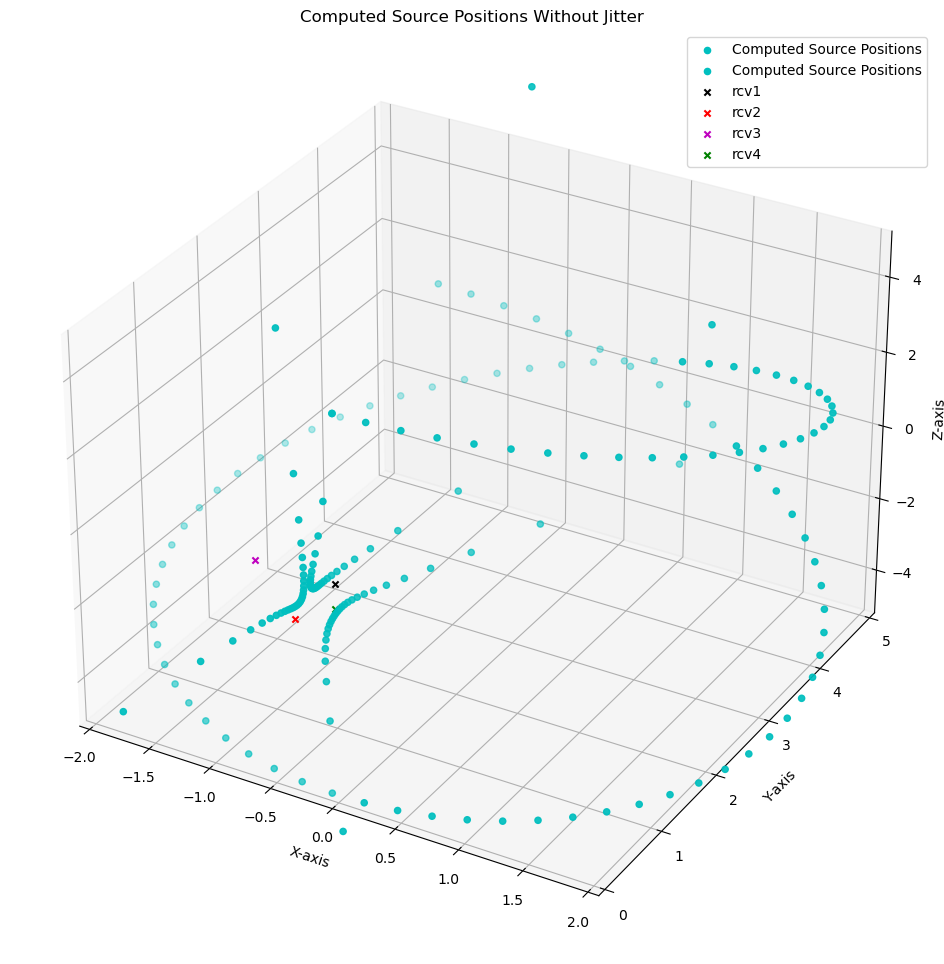

In [63]:
# plot localized source positions (without jitter)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(srcPos1[:,0], srcPos1[:,1], srcPos1[:,2], c = 'c',label='Computed Source Positions', marker='o')
ax.scatter3D(srcPos2[:,0], srcPos2[:,1], srcPos2[:,2], c = 'c',label='Computed Source Positions', marker='o')
ax.scatter3D(rcvPos[0,0],rcvPos[0,1],rcvPos[0,2],c = 'k',label='rcv1', marker='x')
ax.scatter3D(rcvPos[1,0],rcvPos[1,1],rcvPos[1,2],c = 'r',label='rcv2', marker='x')
ax.scatter3D(rcvPos[2,0],rcvPos[2,1],rcvPos[2,2],c = 'm',label='rcv3', marker='x')
ax.scatter3D(rcvPos[3,0],rcvPos[3,1],rcvPos[3,2],c = 'g',label='rcv4', marker='x')
ax.set_xlabel('X-axis');ax.set_ylabel('Y-axis');ax.set_zlabel('Z-axis')
ax.set_xlim3d(-2,2);ax.set_ylim3d(0,5);ax.set_zlim3d(-5,5);ax.legend()
plt.title('Computed Source Positions Without Jitter');plt.show()

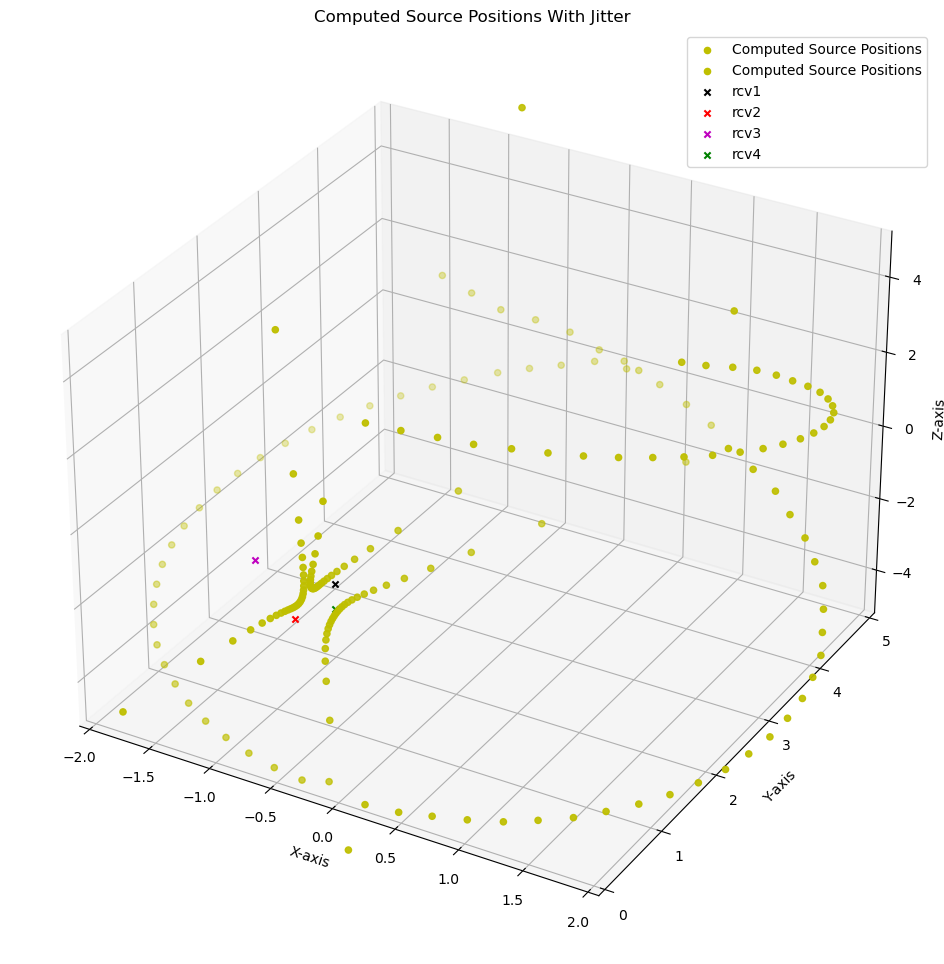

In [64]:
# plot localized source positions (with jitter)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(srcPos1_jittered[:,0], srcPos1_jittered[:,1], srcPos1_jittered[:,2], c = 'y',label='Computed Source Positions', marker='o')
ax.scatter3D(srcPos2_jittered[:,0], srcPos2_jittered[:,1], srcPos2_jittered[:,2], c = 'y',label='Computed Source Positions', marker='o')
ax.scatter3D(rcvPos[0,0],rcvPos[0,1],rcvPos[0,2],c = 'k',label='rcv1', marker='x')
ax.scatter3D(rcvPos[1,0],rcvPos[1,1],rcvPos[1,2],c = 'r',label='rcv2', marker='x')
ax.scatter3D(rcvPos[2,0],rcvPos[2,1],rcvPos[2,2],c = 'm',label='rcv3', marker='x')
ax.scatter3D(rcvPos[3,0],rcvPos[3,1],rcvPos[3,2],c = 'g',label='rcv4', marker='x')
ax.set_xlabel('X-axis');ax.set_ylabel('Y-axis');ax.set_zlabel('Z-axis')
ax.set_xlim3d(-2,2);ax.set_ylim3d(0,5);ax.set_zlim3d(-5,5);ax.legend()
plt.title('Computed Source Positions With Jitter');plt.show()